## Binning data points
### In this example, I will explain how to show the trend of a scatterplot. The data employed here are those of a brightness and a magnetic field images. I am showing how the contrast depends on the magnetic field by taking all the pixels in the images.


In [1]:
## Importing the needed libraries
import numpy as np
import matplotlib.pyplot as plt
import pyfits

In [2]:
## Uploading the data, here a magnetic field map and a brightness image
dir = '/home/fatima/Desktop/project_2/004/'
B = pyfits.getdata(dir+'B_los.fits',ignore_missing_end =True)
C = pyfits.getdata(dir+'cont_inv.fits', ignore_missing_end =True)

### Averaging the Y values into bins of X of equal number of data points

In [29]:
b = np.abs(B)
s = C

## Converting 2D arrays to 1D arrays
b = b.ravel()
s = s.ravel()

## Assigning the x and y of data points into pairs
points = zip(b,s)

## sorting them out
points.sort()


bs = [p[0] for p in points] #All the x's
ss = [p[1] for  p in points] # All the y's


points_bin = 500 #number of data points per bin
bins =(len(b)/points_bin) #number of bins

Bin = np.zeros((bins,points_bin))
Sin = np.zeros((bins,points_bin))

h=n=0
while(h<bins):

    Bin[h] = bs[n:n+points_bin]
    Sin[h] = ss[n:n+points_bin]
    n = n+points_bin
    h = h+1

meanB = np.zeros(bins)
meanS = np.zeros(bins)
stdS = np.zeros(bins)

#computing the average of X and Y and standard deviation of Y in each bin 
for i in range(bins):
 meanB[i] = (Bin[i]).mean()
 meanS[i] = (Sin[i]).mean()
 stdS[i] = (Sin[i]).std()

### Displaying the scatterplot with the averaged y (contrast) values

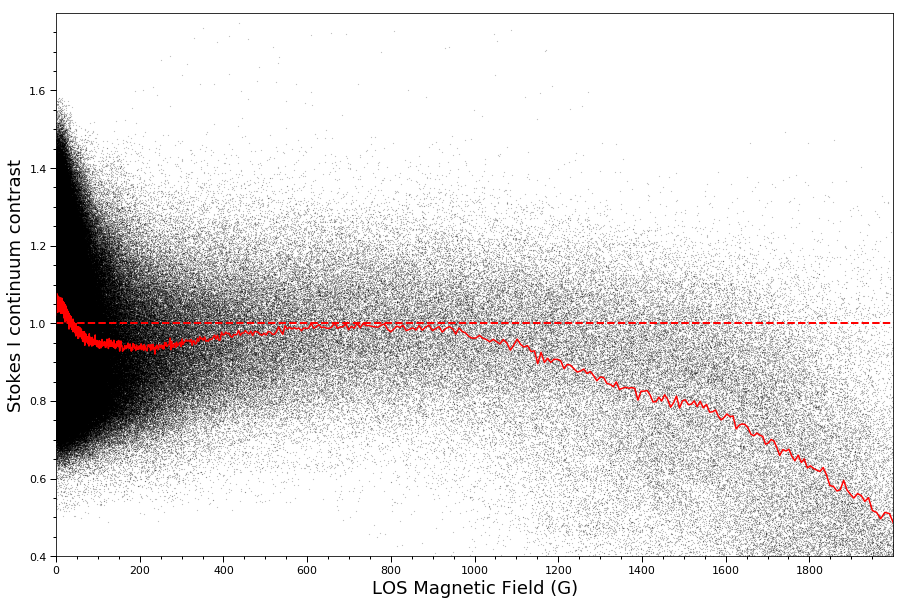

In [32]:
csfont = {'fontname':'Helvetica'}
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(b,s,color='black',marker='.',s=0.1,alpha=0.6)
ax.axhline(y=1,linestyle='dashed',color='r',linewidth=2)
ax.plot(meanB,meanS,color='r')
ax.set_xlabel('LOS Magnetic Field (G)',fontsize=18,**csfont)
ax.set_ylabel('Stokes I continuum contrast',fontsize=18,**csfont)
ax.set_xlim(0,2000)
ax.set_ylim(0.4,1.8) #for continuum contrast

major_ticks = np.arange(0, 2000, 200)
minor_ticks = np.arange(0, 2000, 50)

major_ticks_y = np.arange(0.4,1.8, 0.2) #continuum 


minor_ticks_y = np.arange(0.4, 1.8, 0.05) 

  
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor = True)
ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor = True)
ax.tick_params(axis = 'both', which = 'major', length=6, width=1,labelsize = 11)
ax.tick_params(axis = 'both', which = 'minor', length=3, width=1)

### In the above example, we have averaged the contrast values into bins of magnetic field, let us see if we use the median instead

In [33]:
Bin = np.zeros((bins,points_bin))
Sin = np.zeros((bins,points_bin))

h=n=0
while(h<bins):

    Bin[h] = bs[n:n+points_bin]
    Sin[h] = ss[n:n+points_bin]
    n = n+points_bin
    h = h+1

medianB = np.zeros(bins)
medianS = np.zeros(bins)
stdS = np.zeros(bins)

#computing the average of X and Y and standard deviation of Y in each bin 
for i in range(bins):
 medianB[i] = np.median(Bin[i])
 medianS[i] = np.median(Sin[i])
 stdS[i] = (Sin[i]).std()

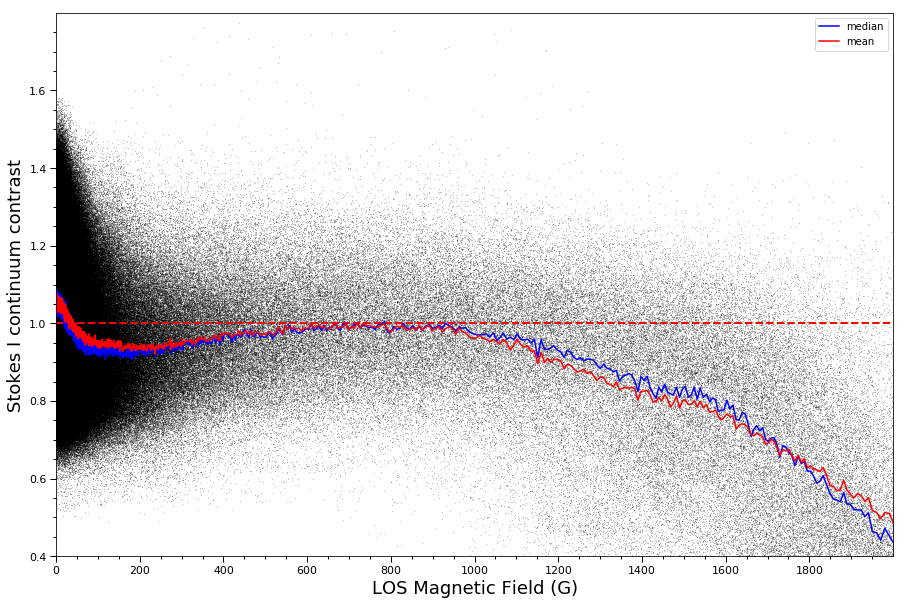

In [34]:
csfont = {'fontname':'Helvetica'}
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(b,s,color='black',marker='.',s=0.1,alpha=0.6)
ax.axhline(y=1,linestyle='dashed',color='r',linewidth=2)
ax.plot(medianB,medianS,color='b',label='median')
ax.plot(meanB,meanS,color='r',label='mean')

ax.set_xlabel('LOS Magnetic Field (G)',fontsize=18,**csfont)
ax.set_ylabel('Stokes I continuum contrast',fontsize=18,**csfont)
ax.set_xlim(0,2000)
ax.set_ylim(0.4,1.8) #for continuum contrast

major_ticks = np.arange(0, 2000, 200)
minor_ticks = np.arange(0, 2000, 50)

major_ticks_y = np.arange(0.4,1.8, 0.2) #continuum 


minor_ticks_y = np.arange(0.4, 1.8, 0.05) 

  
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor = True)
ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor = True)
ax.tick_params(axis = 'both', which = 'major', length=6, width=1,labelsize = 11)
ax.tick_params(axis = 'both', which = 'minor', length=3, width=1)
plt.legend(loc='upper right')

### Another way in showing the trend of a scatterplot is to average into bins of a certain x bandwidth. In this example, we can average the contrast values in bins of 100 G width

In [41]:
total_bins = 100
bins = np.linspace(b.min(), b.max(), total_bins)
delta = bins[1]-bins[0]
idx=np.digitize(b, bins)
running_mean = [np.mean(s[idx==k]) for k in range(total_bins)]
running_std    = [s[idx==k].std() for k in range(total_bins)]

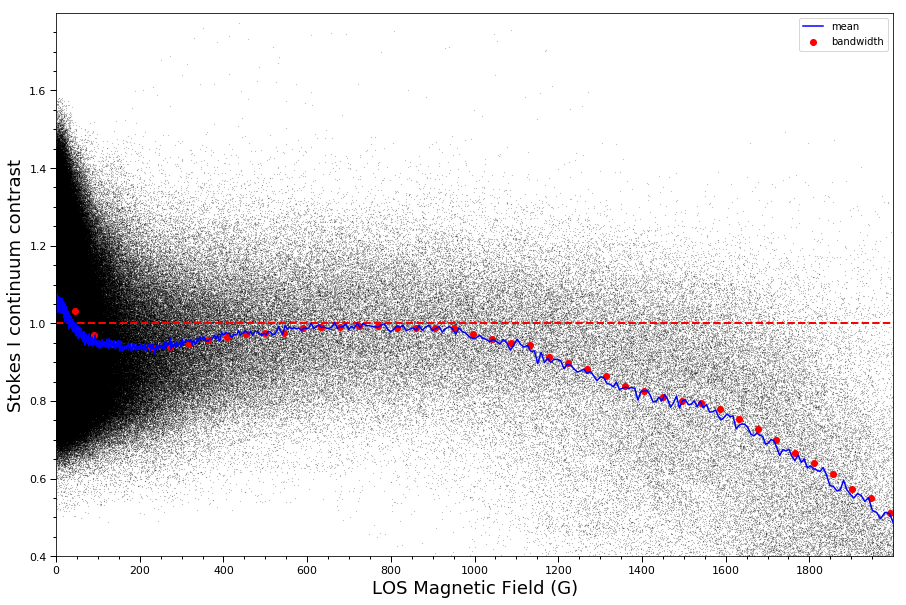

In [43]:
csfont = {'fontname':'Comic Sans MS'}
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ax.scatter(b,s,color='black',marker='.',s=0.1,alpha=0.6)
ax.axhline(y=1,linestyle='dashed',color='r',linewidth=2)
ax.scatter(bins,running_mean,color='r',label='bandwidth')
ax.plot(meanB,meanS,color='b',label='mean')
ax.set_xlabel('LOS Magnetic Field (G)',fontsize=18,**csfont)
ax.set_ylabel('Stokes I continuum contrast',fontsize=18,**csfont)
ax.set_xlim(0,2000)
ax.set_ylim(0.4,1.8) #for continuum contrast

major_ticks = np.arange(0, 2000, 200)
minor_ticks = np.arange(0, 2000, 50)

major_ticks_y = np.arange(0.4,1.8, 0.2) #continuum 


minor_ticks_y = np.arange(0.4, 1.8, 0.05) 

  
ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor = True)
ax.set_yticks(major_ticks_y)
ax.set_yticks(minor_ticks_y, minor = True)
ax.tick_params(axis = 'both', which = 'major', length=6, width=1,labelsize = 11)
ax.tick_params(axis = 'both', which = 'minor', length=3, width=1)
plt.legend(loc='upper right')

### If you test different bandwidths, you will realize that the shape of the bandwidth curve converges to the mean curve for increasing bandwidths